In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

import pickle

from main_utils.cs_comp_utils import gate_comp, comp_matrix

import perform_registration as pr


In [2]:
import sys 
sys.path.append("/home/joseph/Insync/charge_sensor/data/20200904_device_crosstalk/")

In [3]:
gates = ["c8", "c9", "c10", "c11"]

voltages = np.linspace(0, 1500, 16)

In [4]:
dirs = []
data_dict = {}
not_found = 0
for gate in gates:
    for voltage in voltages:
        directory = "run2_" + gate + "_" + str(voltage) + "_ist1_crosstalk" 
        dirs.append(directory)
        
        try: 
            with open("./data/20200904_device_crosstalk/" + directory + '/tuning.pkl', 'rb') as f: 
                data = pickle.load(f)
                data_dict[gate + "_" + str(voltage)] = data
        except FileNotFoundError as e: 
            not_found += 1
    


In [12]:
def plot_gate(name, voltages): 
    trans = np.array(get_all_gate_transforms(name, voltages))
    plt.figure()
    plt.plot(voltages[:len(trans)], trans[:, 0, 0], label="CS2")
    plt.plot(voltages[:len(trans)], trans[:, 1, 1], label="plunger")
    plt.plot(voltages[:len(trans)], trans[:, 2, 2], label="CS1")
    plt.legend()
    plt.xlabel("Gate voltage")
    plt.ylabel("Scaling value")
    plt.title(name.upper())
    plt.show()

def get_poff_points(entry): 
    full_points = np.array(data_dict[entry]['vols_pinchoff'])
    bool_list = list(map(bool, data_dict[entry]['conditional_idx']))
    poff_points = full_points[bool_list]
    return poff_points

def get_all_gate_transforms(gate, voltages): 
    keys = [gate + "_" + str(voltage) for voltage in voltages]
    point_sets = []
    
    for key in keys: 
        try: 
            
            x = get_poff_points(key)
            if len(x) == 0: 
                break 
            point_sets.append(x)
        # catch error caused by missing file - in turn caused by pinchoff issue solved with try/except 
        except KeyError: 
            pass

    transforms = []
    
    print(len(point_sets))
    
    for point_set in point_sets: 
        #print("point set \n", point_set)
        transforms.append(pr.scaling_registration(point_sets[0].T, point_set.T))

    return transforms

0


<IPython.core.display.Javascript object>


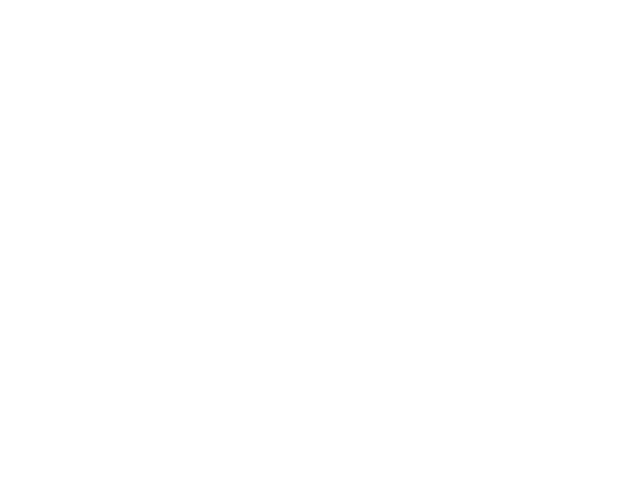

IndexError: too many indices for array

In [13]:
plot_gate("c8", voltages)

0


<IPython.core.display.Javascript object>


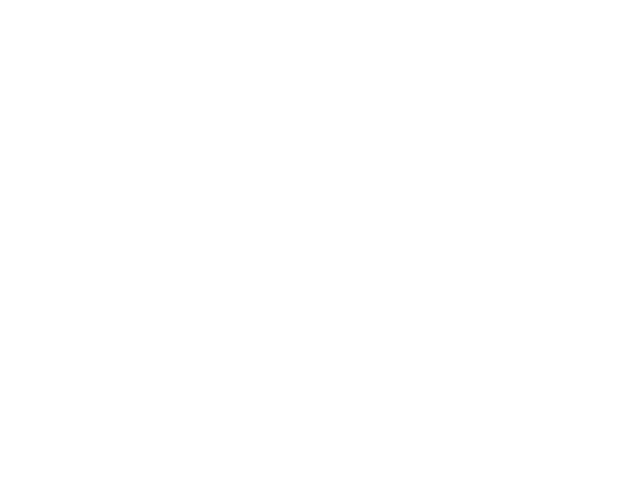

IndexError: too many indices for array

In [14]:
plot_gate("c9", voltages)

0


<IPython.core.display.Javascript object>


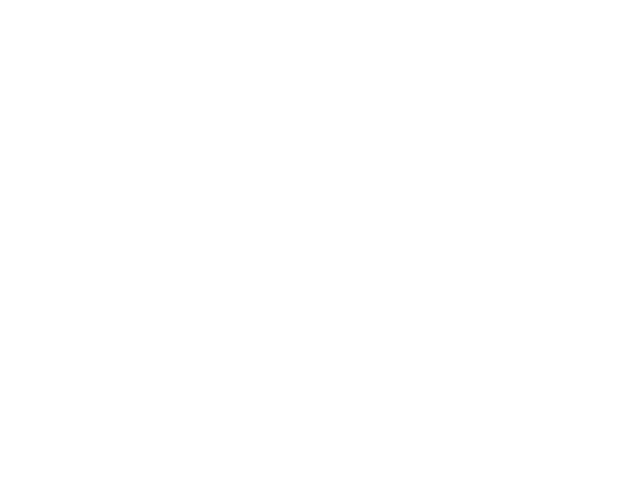

IndexError: too many indices for array

In [7]:
plot_gate("c10", voltages)

0
First transform:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


/home/joseph/PycharmProjects/AutoDot/perform_registration.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


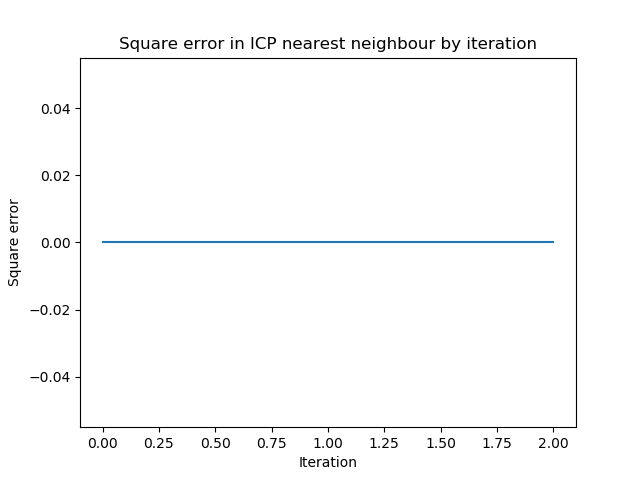

final transform:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
1
First transform:  [[1.00119145 0.         0.        ]
 [0.         1.00119145 0.        ]
 [0.         0.         1.00119145]]


/home/joseph/PycharmProjects/AutoDot/perform_registration.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


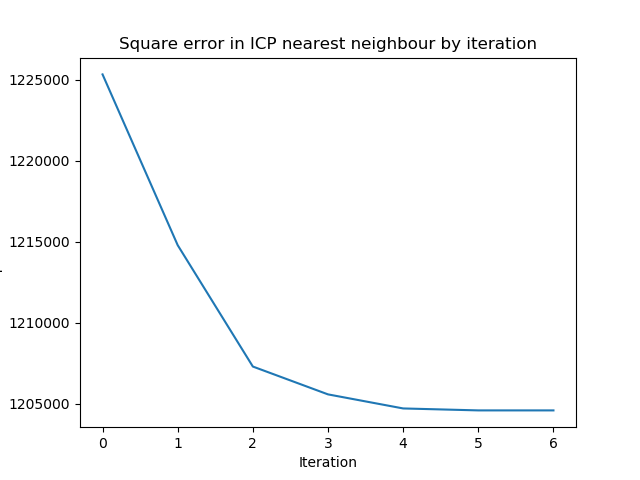

final transform:
 [[1.00543971 0.         0.        ]
 [0.         0.98632421 0.        ]
 [0.         0.         1.00118272]]
2
First transform:  [[0.98407832 0.         0.        ]
 [0.         0.98407832 0.        ]
 [0.         0.         0.98407832]]


/home/joseph/PycharmProjects/AutoDot/perform_registration.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


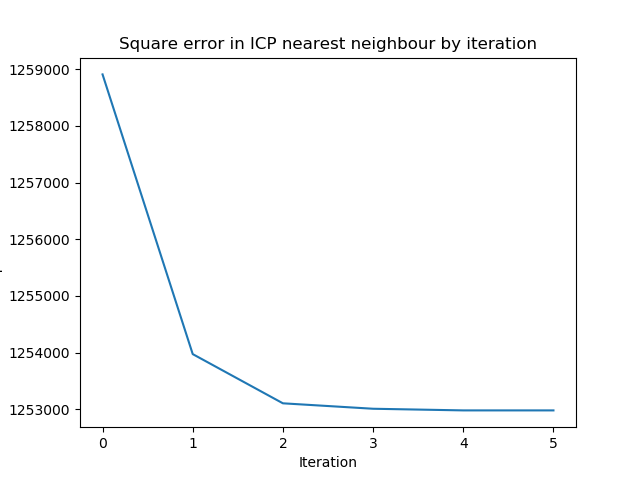

final transform:
 [[0.99366119 0.         0.        ]
 [0.         0.97794021 0.        ]
 [0.         0.         0.9969597 ]]
3
First transform:  [[0.99225725 0.         0.        ]
 [0.         0.99225725 0.        ]
 [0.         0.         0.99225725]]


/home/joseph/PycharmProjects/AutoDot/perform_registration.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


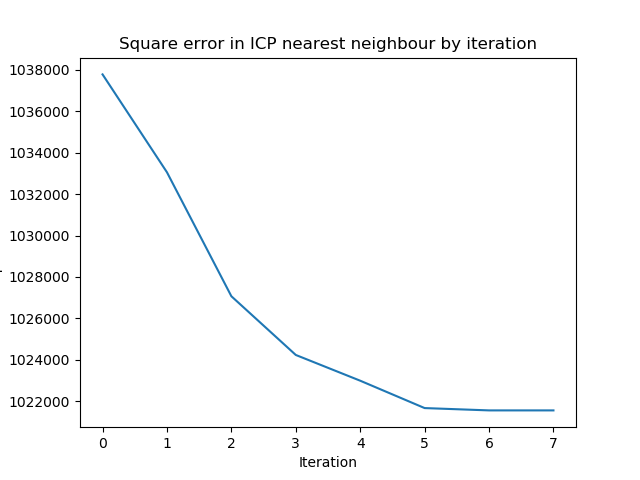

final transform:
 [[1.00009756 0.         0.        ]
 [0.         0.97782489 0.        ]
 [0.         0.         1.0000636 ]]
4
First transform:  [[0.98338628 0.         0.        ]
 [0.         0.98338628 0.        ]
 [0.         0.         0.98338628]]


/home/joseph/PycharmProjects/AutoDot/perform_registration.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


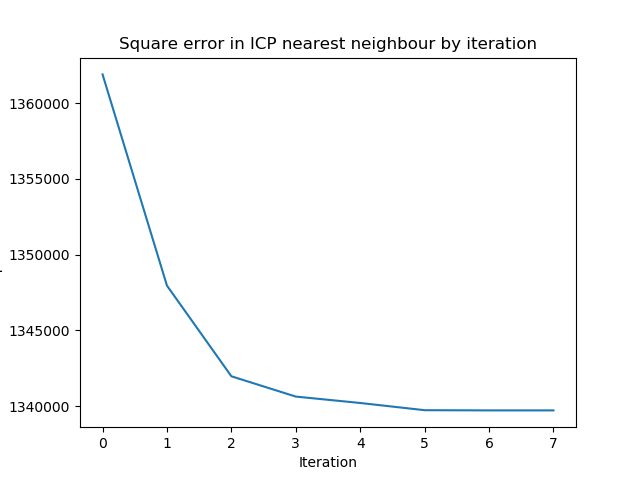

final transform:
 [[0.9951148  0.         0.        ]
 [0.         0.97026505 0.        ]
 [0.         0.         0.99832983]]
5
First transform:  [[1.00005591 0.         0.        ]
 [0.         1.00005591 0.        ]
 [0.         0.         1.00005591]]


/home/joseph/PycharmProjects/AutoDot/perform_registration.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


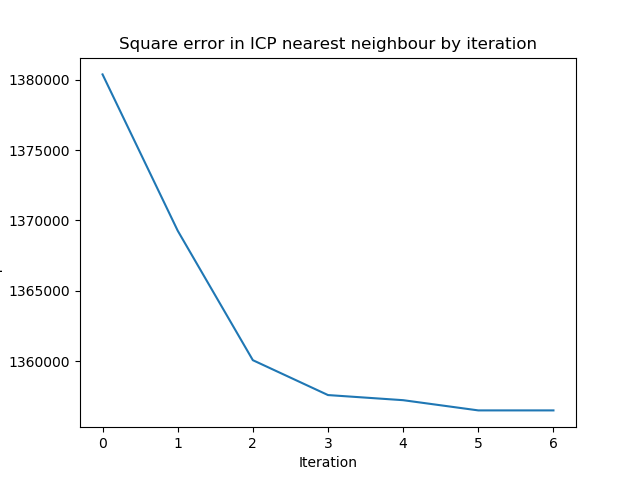

final transform:
 [[0.99426958 0.         0.        ]
 [0.         1.01536884 0.        ]
 [0.         0.         1.00738272]]
6
First transform:  [[0.99097765 0.         0.        ]
 [0.         0.99097765 0.        ]
 [0.         0.         0.99097765]]


/home/joseph/PycharmProjects/AutoDot/perform_registration.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


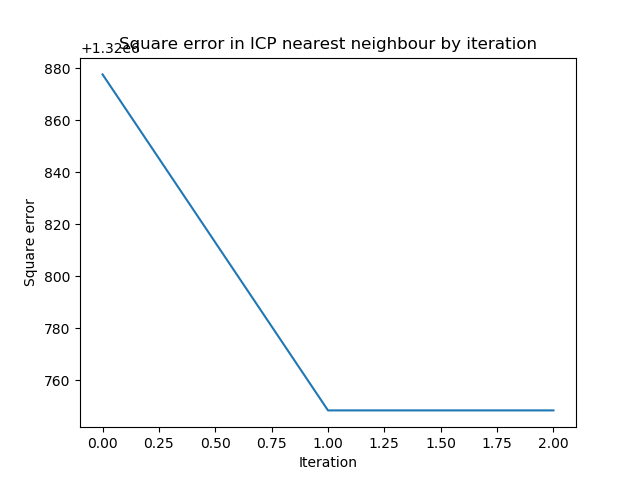

final transform:
 [[0.99650976 0.         0.        ]
 [0.         0.99259811 0.        ]
 [0.         0.         0.994528  ]]
7
First transform:  [[0.99542658 0.         0.        ]
 [0.         0.99542658 0.        ]
 [0.         0.         0.99542658]]


/home/joseph/PycharmProjects/AutoDot/perform_registration.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


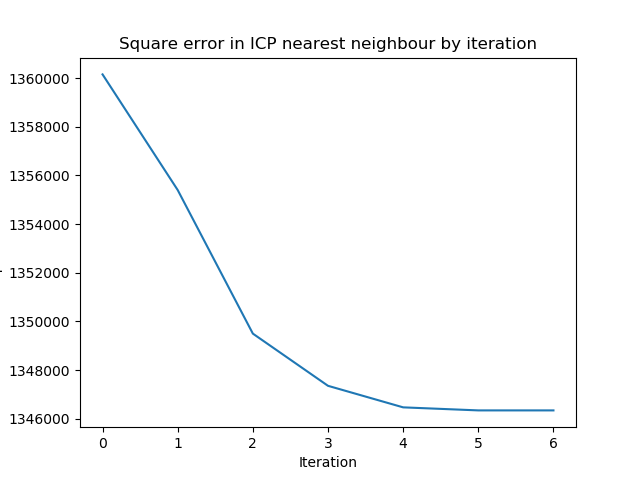

final transform:
 [[0.99422617 0.         0.        ]
 [0.         0.98285671 0.        ]
 [0.         0.         0.99864011]]
8
First transform:  [[0.98888207 0.         0.        ]
 [0.         0.98888207 0.        ]
 [0.         0.         0.98888207]]


/home/joseph/PycharmProjects/AutoDot/perform_registration.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


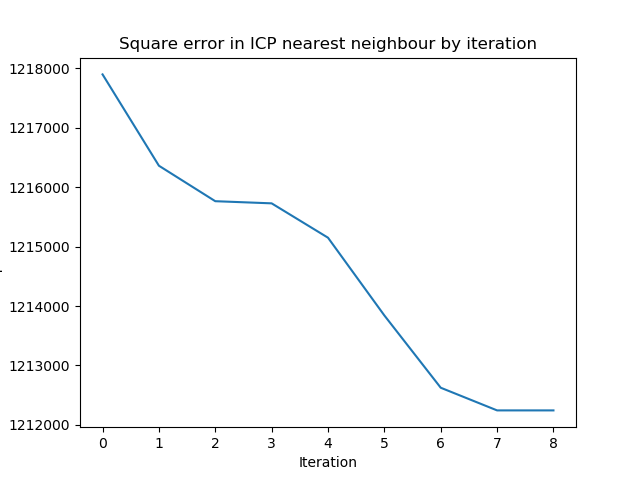

final transform:
 [[0.99487911 0.         0.        ]
 [0.         0.99790472 0.        ]
 [0.         0.         0.99010084]]
9
First transform:  [[0.97881931 0.         0.        ]
 [0.         0.97881931 0.        ]
 [0.         0.         0.97881931]]


/home/joseph/PycharmProjects/AutoDot/perform_registration.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


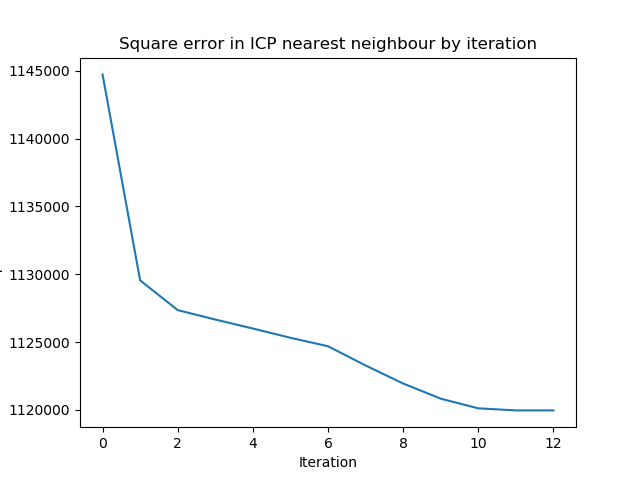

final transform:
 [[0.98492404 0.         0.        ]
 [0.         0.99660407 0.        ]
 [0.         0.         1.00063691]]
10
First transform:  [[0.9834956 0.        0.       ]
 [0.        0.9834956 0.       ]
 [0.        0.        0.9834956]]


/home/joseph/PycharmProjects/AutoDot/perform_registration.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


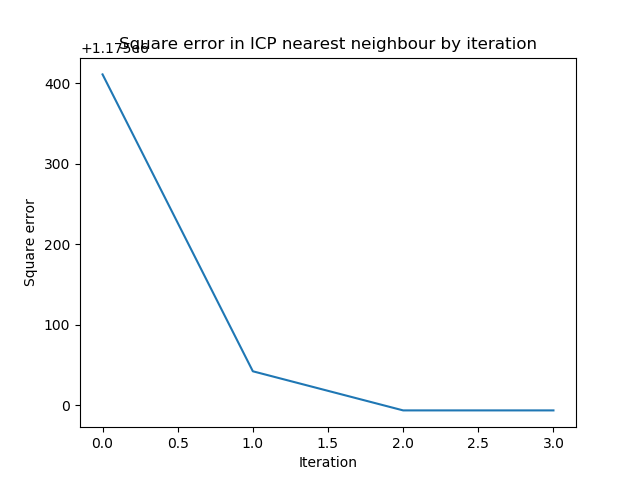

final transform:
 [[0.98661812 0.         0.        ]
 [0.         0.9839336  0.        ]
 [0.         0.         0.99070315]]
11
First transform:  [[1.00303341 0.         0.        ]
 [0.         1.00303341 0.        ]
 [0.         0.         1.00303341]]


/home/joseph/PycharmProjects/AutoDot/perform_registration.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


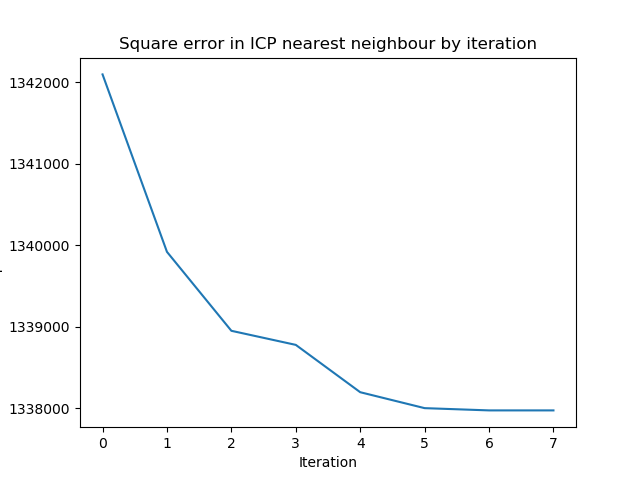

final transform:
 [[0.99032497 0.         0.        ]
 [0.         1.0090865  0.        ]
 [0.         0.         0.99425028]]
12
First transform:  [[0.9855549 0.        0.       ]
 [0.        0.9855549 0.       ]
 [0.        0.        0.9855549]]


/home/joseph/PycharmProjects/AutoDot/perform_registration.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


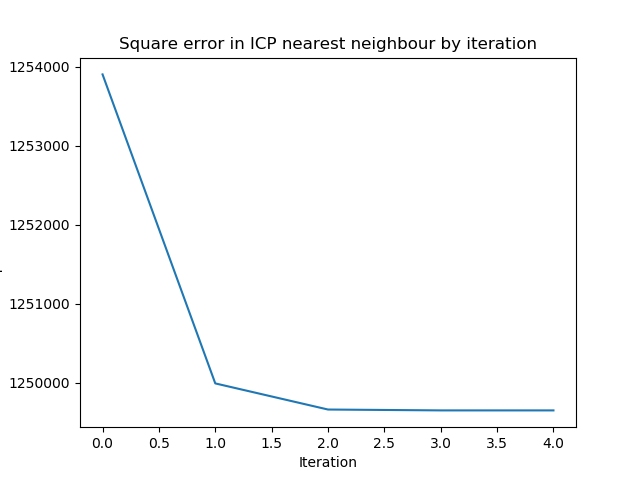

final transform:
 [[0.98552045 0.         0.        ]
 [0.         0.97934729 0.        ]
 [0.         0.         0.99622498]]
13
First transform:  [[0.99562165 0.         0.        ]
 [0.         0.99562165 0.        ]
 [0.         0.         0.99562165]]


/home/joseph/PycharmProjects/AutoDot/perform_registration.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


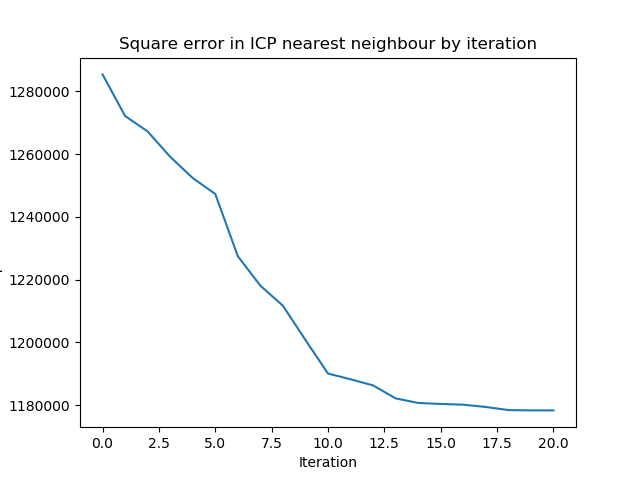

final transform:
 [[0.99080895 0.         0.        ]
 [0.         0.94181468 0.        ]
 [0.         0.         1.00006107]]
14
First transform:  [[0.9786651 0.        0.       ]
 [0.        0.9786651 0.       ]
 [0.        0.        0.9786651]]


/home/joseph/PycharmProjects/AutoDot/perform_registration.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


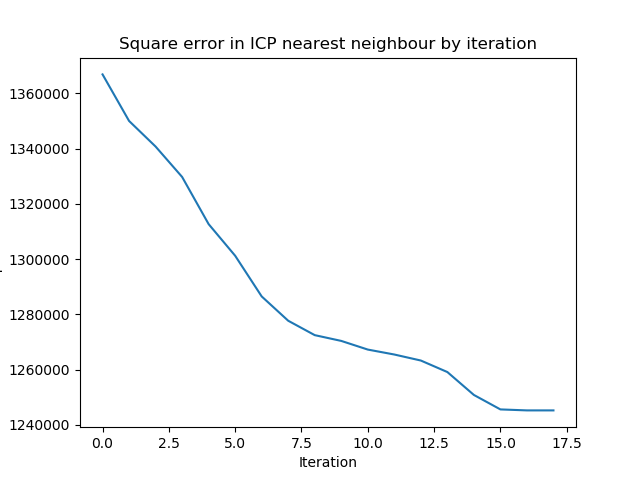

final transform:
 [[0.98658335 0.         0.        ]
 [0.         0.91856704 0.        ]
 [0.         0.         0.99400112]]
15
First transform:  [[0.97898803 0.         0.        ]
 [0.         0.97898803 0.        ]
 [0.         0.         0.97898803]]


/home/joseph/PycharmProjects/AutoDot/perform_registration.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


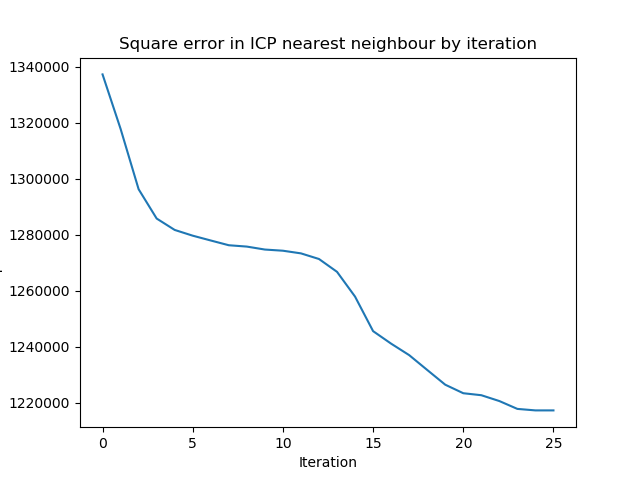

final transform:
 [[0.98335854 0.         0.        ]
 [0.         0.91418357 0.        ]
 [0.         0.         0.99222409]]


/home/joseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


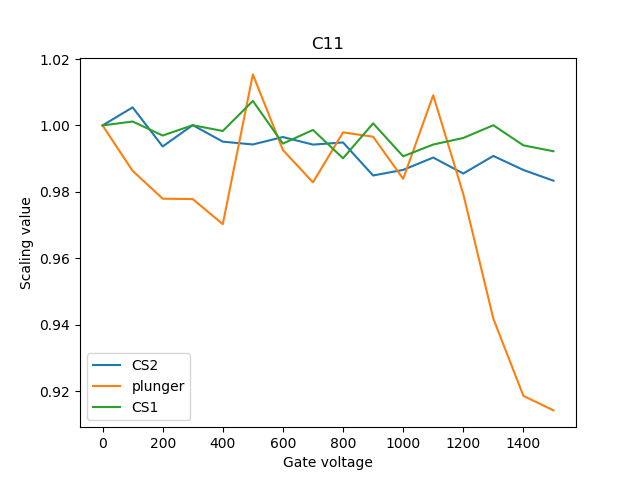

In [110]:
plot_gate("c11", voltages)

In [9]:
transforms = [get_all_gate_transforms(gate, voltages) for gate in gates]

0
0
0
0


In [10]:
cs_gates = [0, 1, 2]

gate_comps = np.array([gate_comp(cs_gates, list(voltages)[:len(transform)], np.array(transform)) for transform in transforms])


IndexError: too many indices for array

In [8]:
gate_comps

array([<main_utils.cs_comp_utils.gate_comp object at 0x7f808e1fb910>,
      dtype=object)

In [16]:
comp_matrix(gate_comps, [-400, -280, -300, -290])

array([[0.99550374, 0.        , 0.        ],
       [0.        , 0.97750985, 0.        ],
       [0.        , 0.        , 1.01543613]])

/home/joseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


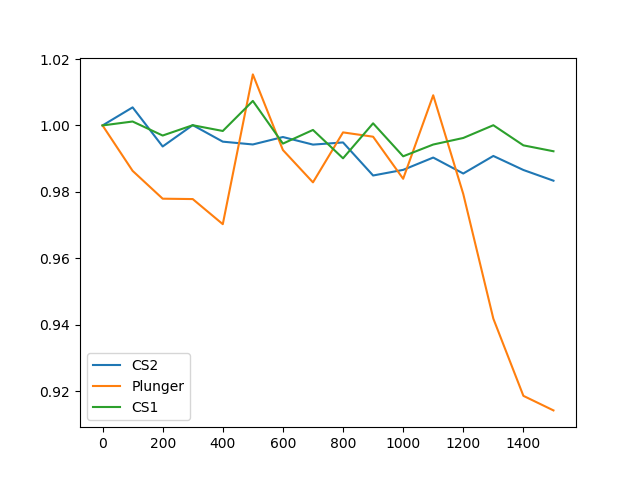

In [103]:
plt.figure()
plt.plot(voltages[:len(c)], c[:, 0, 0], label="CS2")
plt.plot(voltages[:len(c)], c[:, 1, 1], label="Plunger")
plt.plot(voltages[:len(c)], c[:, 2, 2], label="CS1")
plt.legend()
plt.show()

def plot_gate(name, voltages): 
    trans = np.array(get_all_gate_transforms(name, voltages))
    plt.figure()
    plt.plot(voltages[:len(trans)], trans[:, 0, 0], label="CS2")
    plt.plot(voltages[:len(trans)], trans[:, 1, 1], label="plunger")
    plt.plot(voltages[:len(trans)], trans[:, 2, 2], label="CS1")
    plt.legend()
    plt.show()
